In [1]:
!pip install scikit-learn numpy pandas matplotlib


Defaulting to user installation because normal site-packages is not writeable


# 1. Import supportive libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


# 2. Load the dataset.

In [2]:
iris = pd.read_csv(r'C:\Users\Fast Computers\Downloads\archive (16)\Iris.csv')

# 3. EDA steps.

In [3]:
iris.head(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris.shape

(150, 6)

In [5]:
iris.duplicated().sum()

0

In [6]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
Dataset = iris.drop(labels='Id', axis=1)

In [13]:
Dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
Dataset['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [15]:

Dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

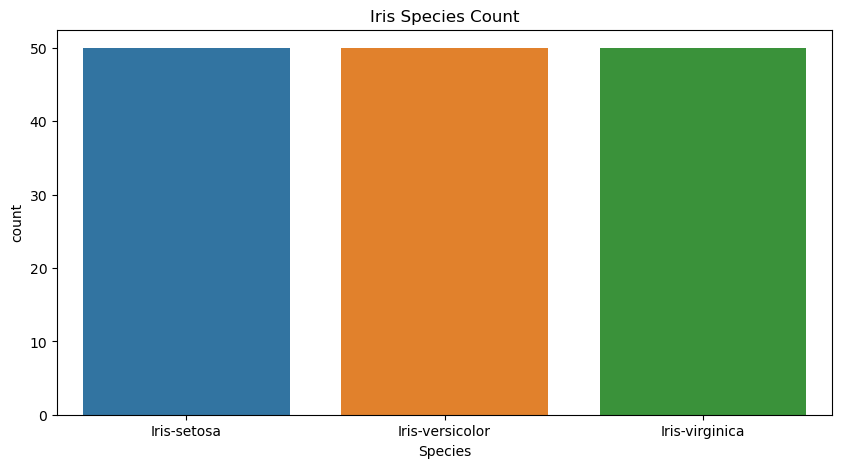

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.subplots(1, 1, figsize=(10,5))
sns.countplot(x=Dataset['Species'])
plt.title("Iris Species Count")
plt.show()


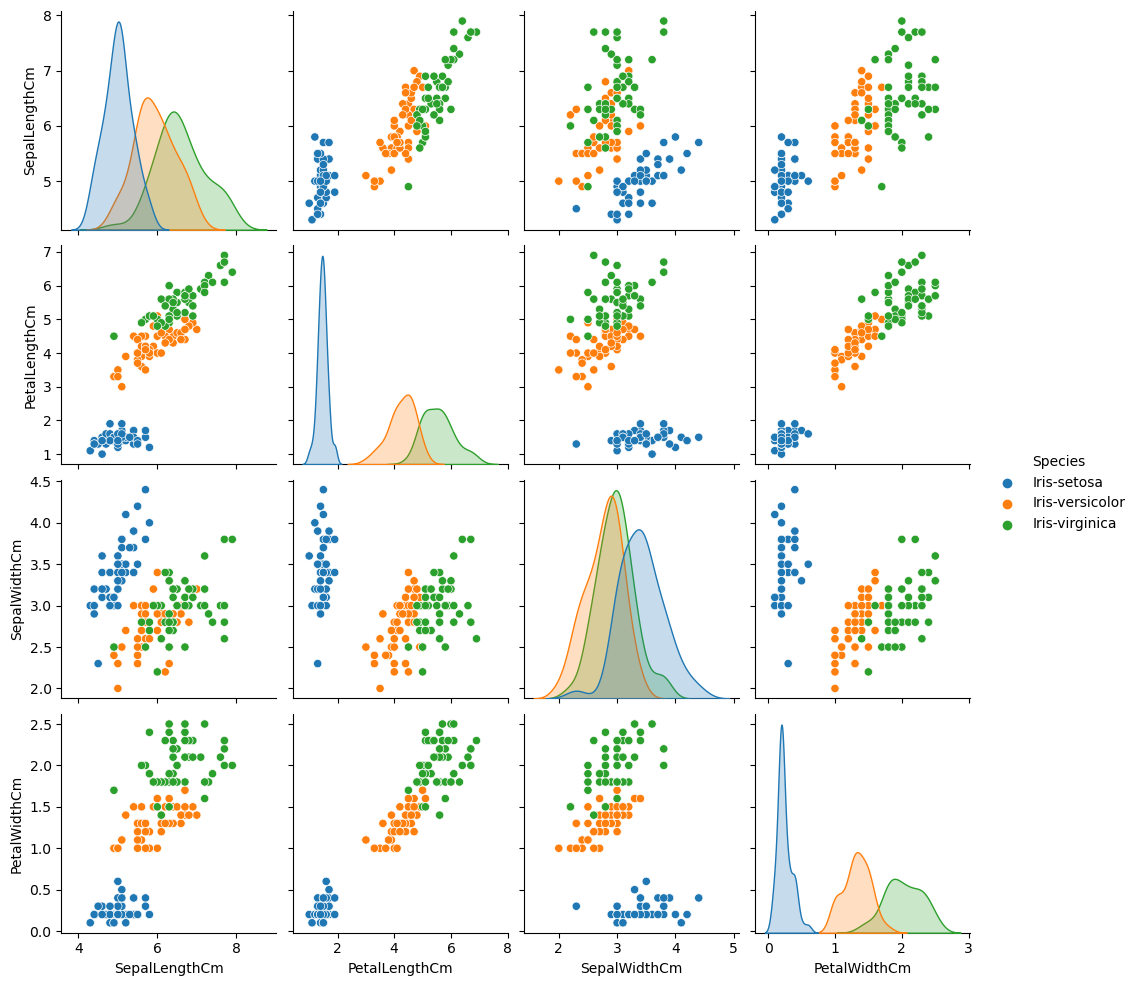

In [15]:

# Create pair plots for sepal length, petal length, sepal width, and petal width
sns.pairplot(iris, hue="Species", vars=["SepalLengthCm", "PetalLengthCm", "SepalWidthCm", "PetalWidthCm"])
plt.show()


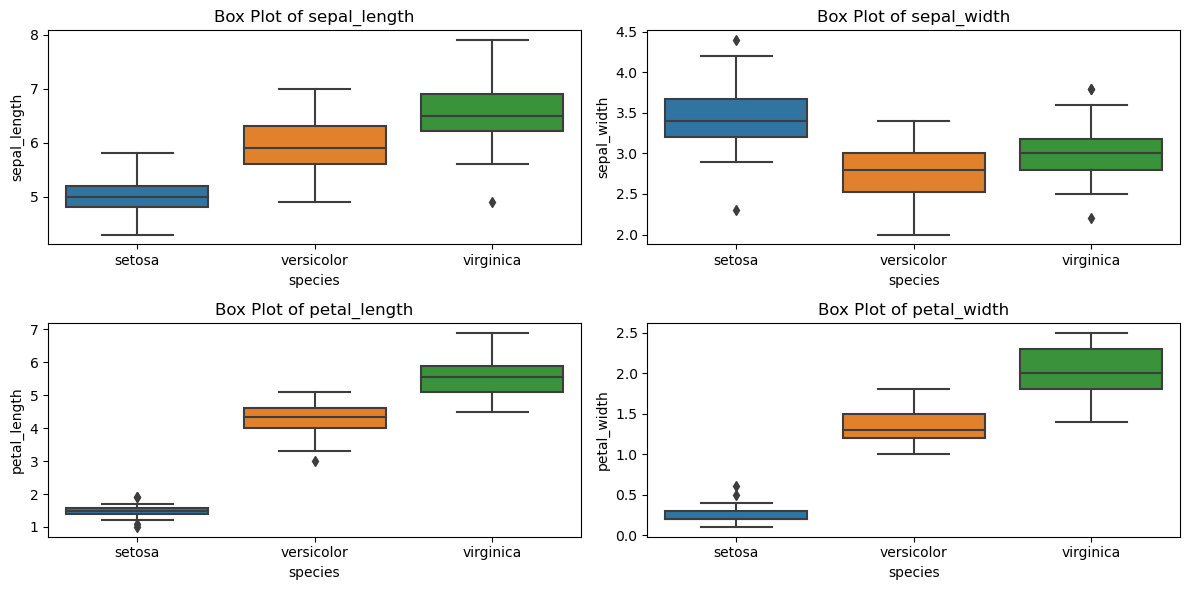

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset("iris")

# Create a box plot for each feature (column)
plt.figure(figsize=(12, 6))

# Loop through each feature
for i, feature in enumerate(iris.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x="species", y=feature, data=iris)
    plt.title(f"Box Plot of {feature}")

plt.tight_layout()
plt.show()


In [17]:
print(Dataset.corr)

<bound method DataFrame.corr of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]>


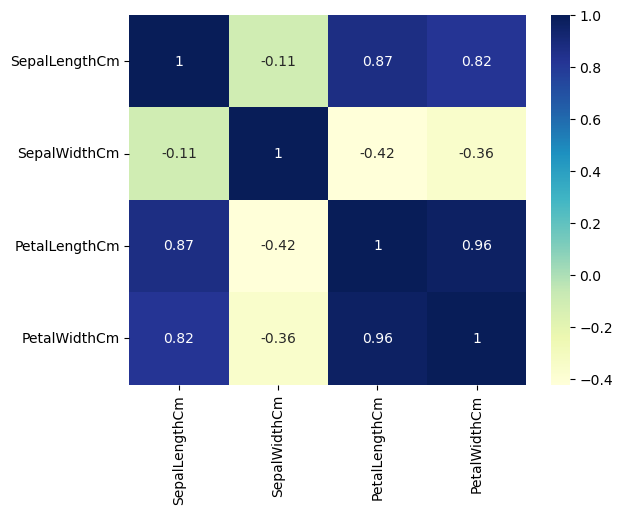

In [18]:
sns.heatmap(Dataset.corr(numeric_only = True), cmap="YlGnBu", annot=True)
plt.show()

In [19]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# 4. Application of ML algorithms.

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
x = iris.data  # Features
y = iris.target  # Target (labels)

# Split the data into training and testing sets (e.g., 70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# You can adjust the 'test_size' parameter to change the split ratio
# 'random_state' is set for reproducibility; you can choose any integer value

# Check the shape of the training and testing sets
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)





X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset and split it as previously shown
iris = load_iris()
x = iris.data  # Features
y = iris.target  # Target (labels)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Initialize and train the models
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(x_train, y_train)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

lsvc = SVC(kernel='linear', random_state=0)
lsvc.fit(x_train, y_train)

rbf = SVC(kernel='rbf', random_state=0)
rbf.fit(x_train, y_train)

lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

gnb = GaussianNB()
gnb.fit(x_train, y_train)

# After training the models, you can make predictions on the test data
y_pred_knn = knn.predict(x_test)
y_pred_decision_tree = decision_tree.predict(x_test)
y_pred_random_forest = random_forest.predict(x_test)
y_pred_lsvc = lsvc.predict(x_test)
y_pred_rbf = rbf.predict(x_test)
y_pred_logistic_regression = lr.predict(x_test)
y_pred_gnb = gnb.predict(x_test)

# Now, you can evaluate the models using accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_lsvc = accuracy_score(y_test, y_pred_lsvc)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

print("Accuracy - KNN:", accuracy_knn)
print("Accuracy - Decision Tree:", accuracy_decision_tree)
print("Accuracy - Random Forest:", accuracy_random_forest)
print("Accuracy - Linear SVM:", accuracy_lsvc)
print("Accuracy - RBF SVM:", accuracy_rbf)
print("Accuracy - Logistic Regression:", accuracy_logistic_regression)
print("Accuracy - Gaussian Naive Bayes:", accuracy_gnb)


Accuracy - KNN: 0.9777777777777777
Accuracy - Decision Tree: 0.9777777777777777
Accuracy - Random Forest: 0.9777777777777777
Accuracy - Linear SVM: 0.9777777777777777
Accuracy - RBF SVM: 0.9777777777777777
Accuracy - Logistic Regression: 0.9777777777777777
Accuracy - Gaussian Naive Bayes: 1.0


In [42]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Assuming you have your training data (x_train, y_train) and test data (x_test, y_test)

# Create and train the SVM model
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Create and train the Logistic Regression model
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

# Create and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# Create and train the KNN model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
# Make predictions on the test data
y_pred_svm = svm_model.predict(x_test)
y_pred_logistic_regression = lr.predict(x_test)
y_pred_gnb = gnb.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_decision_tree = decision_tree.predict(x_test)
y_pred_random_forest = random_forest.predict(x_test)
# Now you can calculate the confusion matrices
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_lr = confusion_matrix(y_test, y_pred_logistic_regression)
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_DT = confusion_matrix(y_test, y_pred_decision_tree)
cm_RF = confusion_matrix(y_test,y_pred_random_forest)
# Print the confusion matrices
print("Confusion Matrix - SVM:\n", cm_svm)
print("Confusion Matrix - Logistic Regression:\n", cm_lr)
print("Confusion Matrix - Gaussian Naive Bayes:\n", cm_gnb)
print("Confusion Matrix - KNN:\n", cm_knn)
print("Confusion Matrix - Decision Tree:\n", cm_DT)
print("Confusion Matris - Random Forest:\n", cm_RF)


Confusion Matrix - SVM:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Confusion Matrix - Logistic Regression:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Confusion Matrix - Gaussian Naive Bayes:
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Confusion Matrix - KNN:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Confusion Matrix - Decision Tree:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Confusion Matris - Random Forest:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


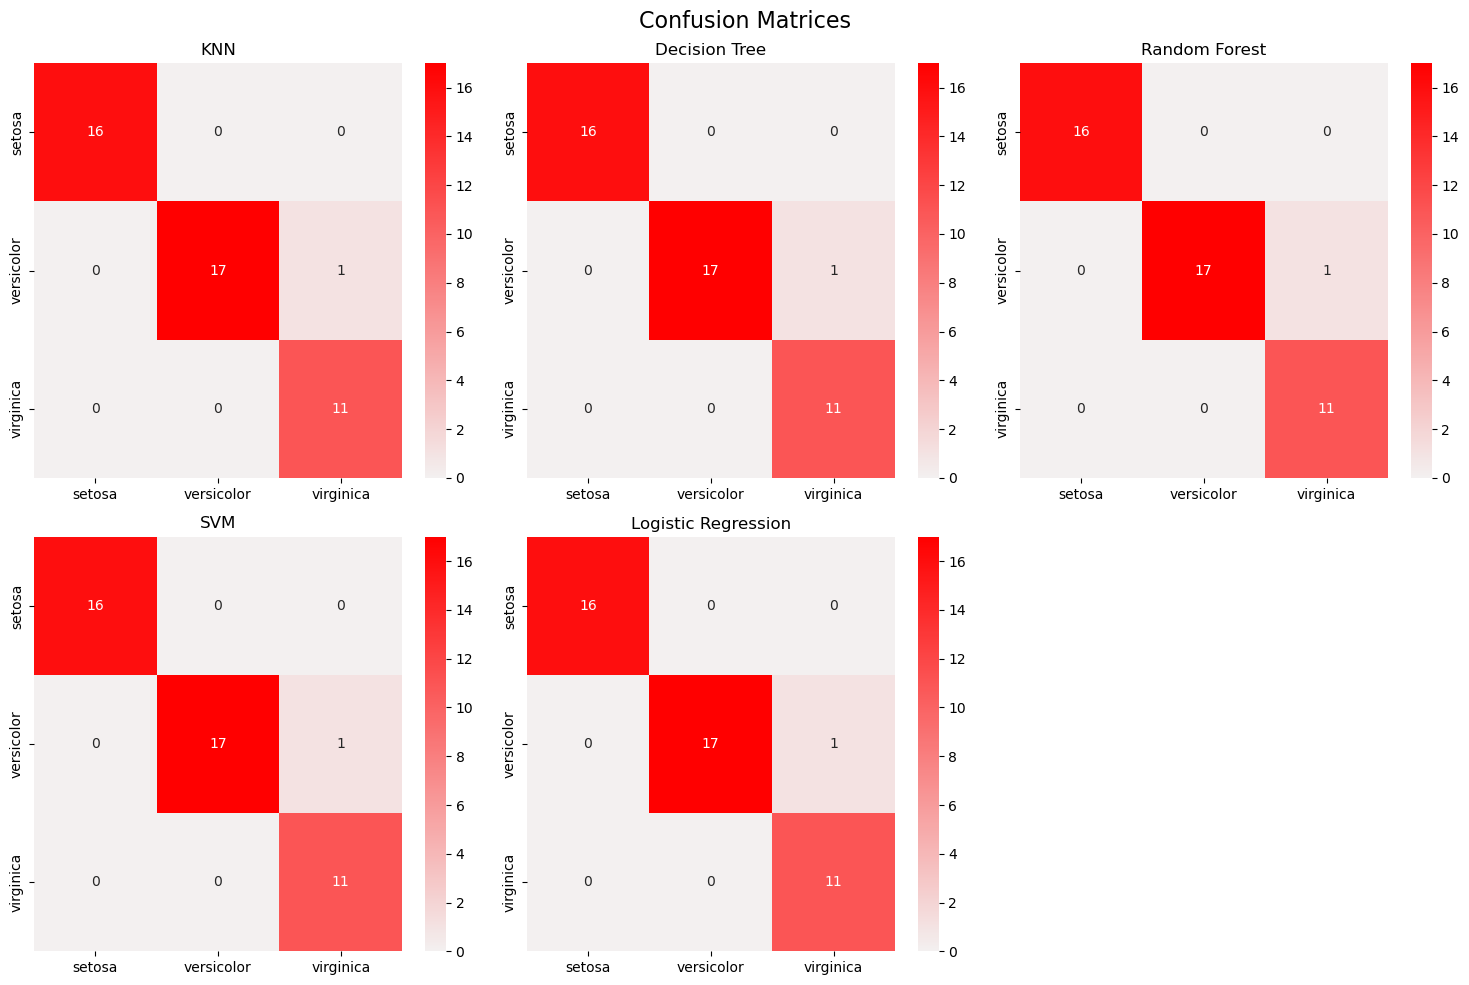

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already calculated your confusion matrices (e.g., cm_knn, cm_decision_tree, etc.)

# Define the class names
class_names = ['setosa', 'versicolor', 'virginica']

# Create subplots for each confusion matrix
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Confusion Matrices', fontsize=16)

# Define the color map for the heatmap
cmap = sns.light_palette("red", as_cmap=True)

# Plot the confusion matrix for KNN
sns.heatmap(cm_knn, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap=cmap, ax=axes[0, 0])
axes[0, 0].set_title('KNN')

# Plot the confusion matrix for Decision Tree
sns.heatmap(cm_DT, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap=cmap, ax=axes[0, 1])
axes[0, 1].set_title('Decision Tree')

# Plot the confusion matrix for Random Forest
sns.heatmap(cm_RF, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap=cmap, ax=axes[0, 2])
axes[0, 2].set_title('Random Forest')

# Plot the confusion matrix for SVM
sns.heatmap(cm_svm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap=cmap, ax=axes[1, 0])
axes[1, 0].set_title('SVM')

# Plot the confusion matrix for Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap=cmap, ax=axes[1, 1])
axes[1, 1].set_title('Logistic Regression')

# Remove the empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()


In [16]:
import warnings
!pip install ydata-profiling




Defaulting to user installation because normal site-packages is not writeable
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.


In [25]:
from ydata_profiling import ProfileReport
import pandas as pd
df = pd.read_csv(r'C:\Users\Fast Computers\Downloads\archive (16)\Iris.csv')
profile = ProfileReport(df, title='Data Profile Report')

# To display the report in a Jupyter Notebook
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]